# MLFlow for Kaggle II - Loan Approval Prediction

In this notebook we will use the Loan Approval dataset to demonstrate how to build a machine learning pipeline using the MLFlow library. We will use the following steps:

1. Data Collection
2. Data Exploration
3. EDA - Exploratory Data Analysis
4. Data Preprocessing
5. Model Selection
6. Model Training
7. Model Evaluation
8. Model Optimization
9. Model Tracking
10. Kaggle Submission


## 1. Data Collection

### Loan Approval Prediction

Go to the [Loan Approval Prediction Competition](https://www.kaggle.com/competitions/playground-series-s4e10/overview). **Join the competition** and accept the terms and conditions.

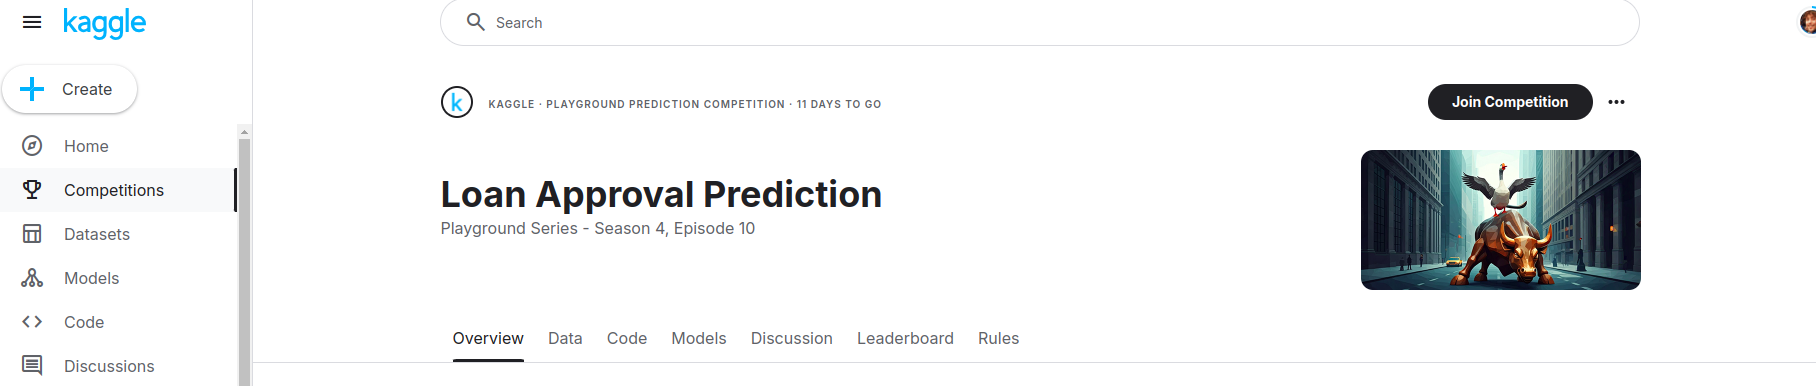

Now **download the data manually** by going to `Data` > `Download Data`

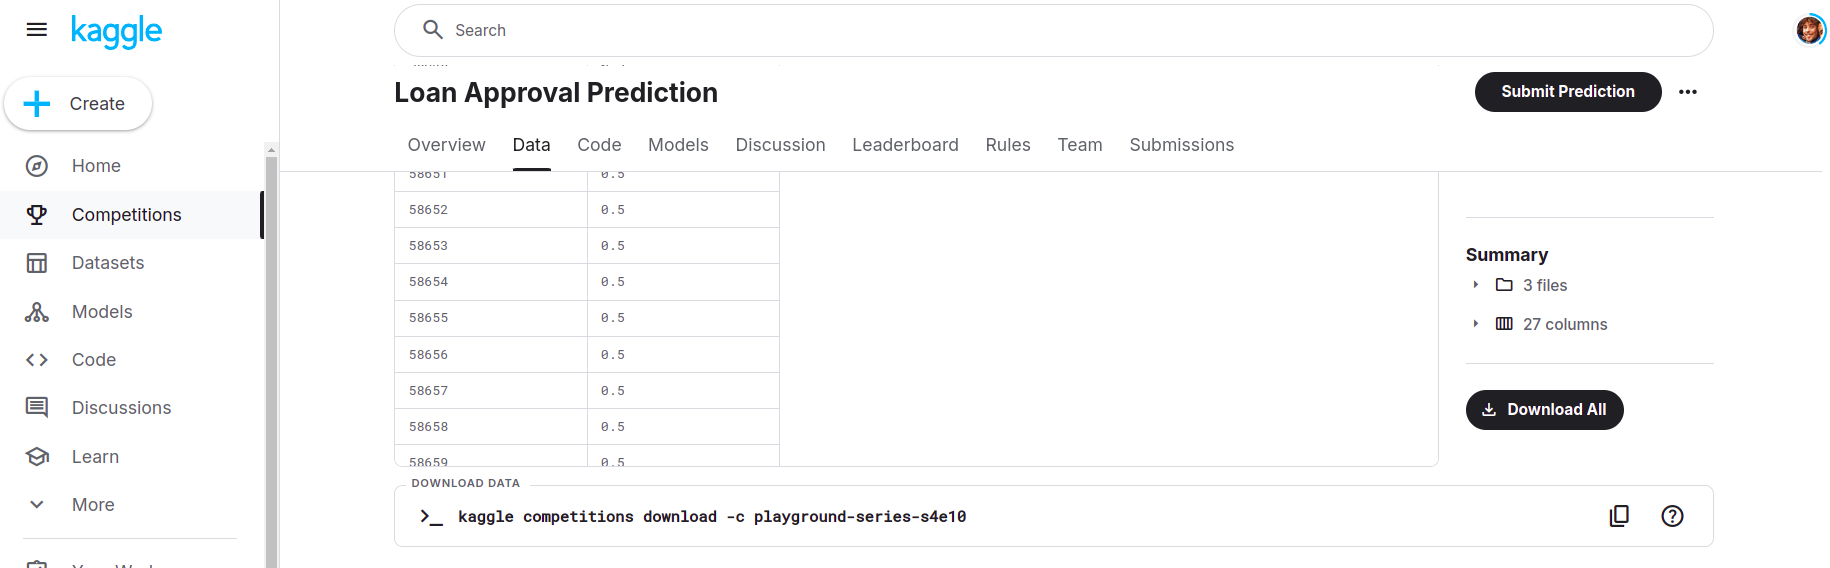

Once we've downloaded the data we are going to save it into `data/loan_prediciton`. We can see there are three files:

- `train.csv`: The training data
- `test.csv`: The test data
- `sample_submission.csv`: The sample submission file

ℹ️ Remember that `test.csv` does not have the target column, we will use it to evaluate our model against the kaggle platform.

## 2. Data Exploration

Let's load the data and take a look at the first few rows.

In [1]:
import pandas as pd


DATA_FOLDER = "../data/loan_prediction/"
TRAIN_CSV_PATH = DATA_FOLDER + "train.csv"
TEST_CSV_PATH = DATA_FOLDER + "test.csv"


train_df = pd.read_csv(TRAIN_CSV_PATH, index_col='id')
test_df = pd.read_csv(TEST_CSV_PATH, index_col='id')

train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


**Feature Descriptions**

- person_age: Applicant’s age in years.
- person_income: Annual income of the applicant in USD.
- person_home_ownership: Status of homeownership (e.g., Rent, Own, Mortgage).
- person_emp_length: Length of employment in years.
- loan_intent: Purpose of the loan (e.g., Education, Medical, Personal).
- loan_grade: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.
- loan_amnt: Total loan amount requested by the applicant.
- loan_int_rate: Interest rate associated with the loan.
- loan_percent_income: Percentage of the applicant’s income allocated towards loan repayment.
- cb_person_default_on_file: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).
- cb_person_cred_hist_length: Length of the applicant’s credit history in years.
- loan_status: The approval status of the loan (1 for rejected, 0 for approved).

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


## 3. EDA - Exploratory Data Analysis

Let's dive into the data and understand it better. In order to do so we import the plotting libraries.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt




We will look at the following:

- Distribution of the loan amount


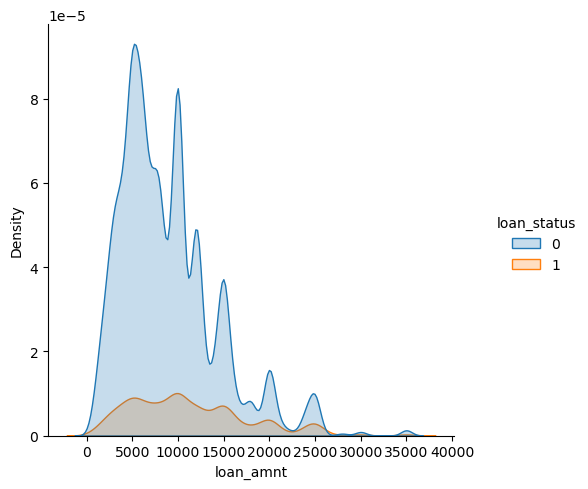

In [4]:
ax = sns.displot(train_df, x='loan_amnt', hue='loan_status', kind='kde', fill=True)

- Distribution of the applicant income

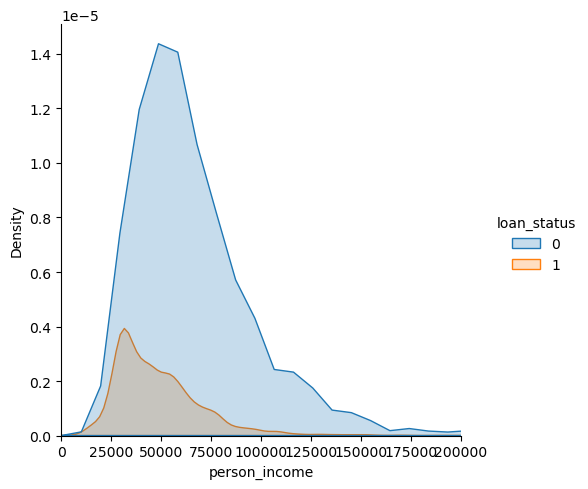

In [5]:
ax = sns.displot(train_df, x='person_income', hue='loan_status', kind='kde', fill=True)
ax.set(xlim=(0, 200000))

- person income vs loan amount

[(0.0, 200000.0)]

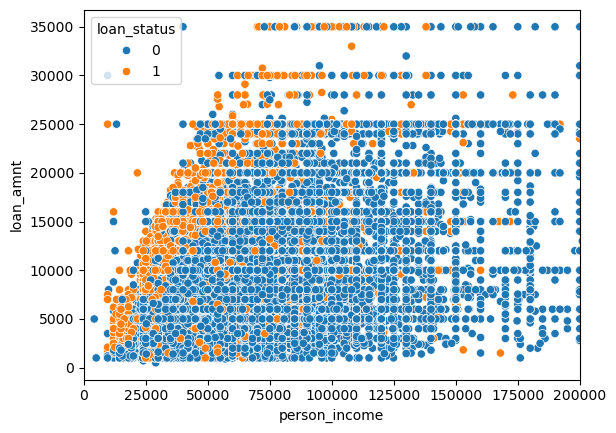

In [6]:
ax = sns.scatterplot(data=train_df, x='person_income', y='loan_amnt', hue='loan_status')
ax.set(xlim=(0, 200000))

- Loan Percent Income

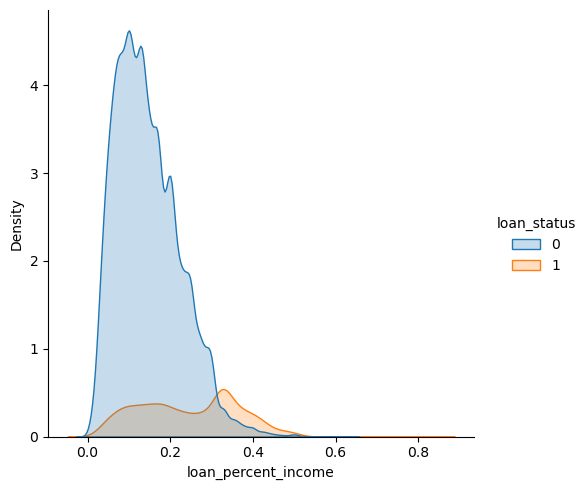

In [7]:
ax = sns.displot(train_df, x='loan_percent_income', hue='loan_status', kind='kde', fill=True)

## 4. Data Preprocessing

Remember that we need to preprocess the data before training the model. We will do the following steps:

- Encode the categorical columns
- Scale the numerical columns


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


num_features = [
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
]

cat_features = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file',
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features),
    ]
)

## 5. Model Selection

We will use a Random Forest Classifier to predict the loan approval status.

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


base_model = RandomForestClassifier(n_estimators=100, random_state=42)

We are going to create a **Pipeline**. This drastically simplifies the process of building a machine learning model because it bundles the preprocessing and the model into a single object.

In [10]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('base_model', base_model),
])

## 6. Model Training

Split the data into train and validation sets.

In [11]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 42

X = train_df.drop(columns=['loan_status'])
y = train_df['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat', OneHotEncoder(),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('base_model', RandomForestClassifier(random_state=42))])

## 7. Model Evaluation

We use the area under the ROC curve to evaluate the model.

In [13]:
from sklearn.metrics import roc_auc_score


y_pred = pipeline.predict(X_val)
auc_metric = roc_auc_score(y_val, y_pred)

print(f'AUC: {auc_metric:.4f}')

AUC: 0.8539


Display the ROC Curve

Text(0.5, 1.0, 'ROC Curve')

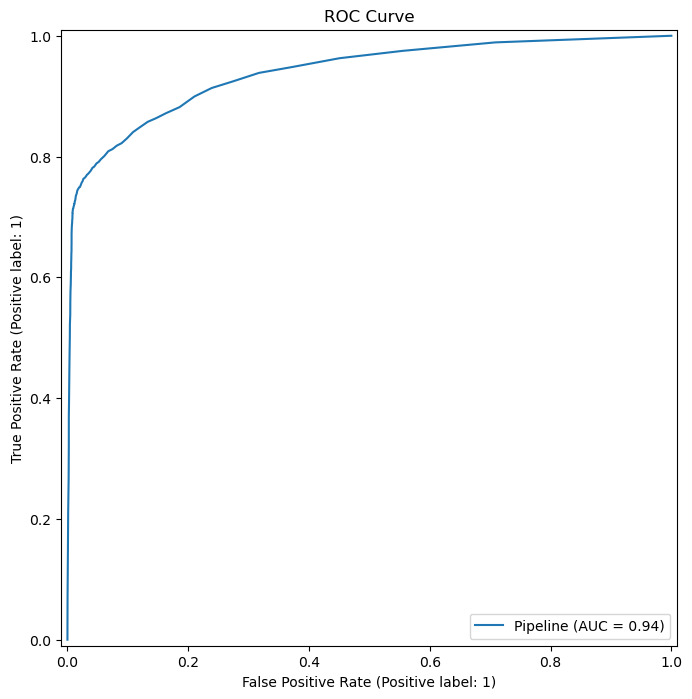

In [14]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(pipeline, X_val, y_val, ax=ax)
ax.set_title('ROC Curve')

## 8. Model Optimization

**At which point should we stop giving loans?**

We should stop giving loans away **the moment that our profit is lower than the loss of giving the loan**. In other words our goal is to minimize the profit sacrificed (FP) while maximizing the loss avoided (TP). At this point we are giving the loans the moment the probability of being a good loan is greater that 0.5. But this may not be the optimal point because the money we lose by giving a loan to a bad applicant is not the same as the money we win by giving a loan to a good applicant when we are 50% sure about our choice.

```plaintext
objective = Maximize(Amount of money we lose by TP - Amount of money we win by FP)

First we compute the probabilities of being correctly predicting a bad loan (true positive):

In [15]:
y_probs = pipeline.predict_proba(X_val)
y_tp_probs = y_probs[:, 1]  # 1 == bad loan

Then we compute the False Positives Ratio (FPR)  and the True Positives Ratio (TPR) for each threshold.

In [16]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_val, y_tp_probs)

Finally we compute the optimal point by maximizing the objective function: maximizing the difference between the True Positives and the False Positives.

In [17]:
import numpy as np


optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
fpr_optimal = fpr[optimal_idx]
tpr_optimal = tpr[optimal_idx]

print(f'Optimal threshold: {optimal_threshold:.4f}')
print(f'FPR: {fpr_optimal:.4f}')
print(f'TPR: {tpr_optimal:.4f}')

Optimal threshold: 0.1900
FPR: 0.0676
TPR: 0.8088


We compare the AUC when we use the threshold of 0.5 (default).

In [18]:
average_idx = len(thresholds) // 2
average_threshold = thresholds[average_idx]
fpr_average = fpr[average_idx]
tpr_average = tpr[average_idx]

print(f'Average threshold: {average_threshold:.4f}')
print(f'FPR: {fpr_average:.4f}')
print(f'TPR: {tpr_average:.4f}')

Average threshold: 0.5000
FPR: 0.0111
TPR: 0.7217


Plot the AUC for the optimal threshold and the default threshold.

Text(0.011103400416377515, 0.7216808769792935, 'Average Threshold: 0.50')

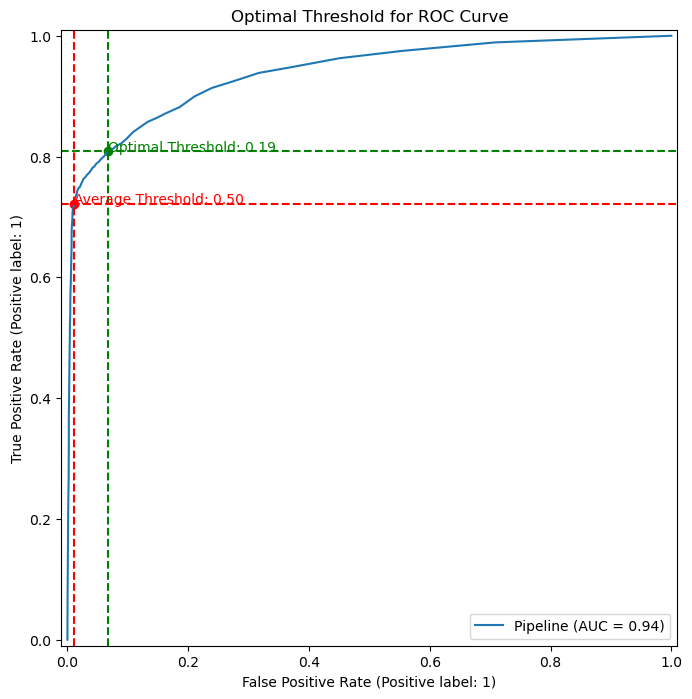

In [19]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(pipeline, X_val, y_val, ax=ax)
ax.set_title('Optimal Threshold for ROC Curve')

# add optimal point coordinates
ax.axvline(fpr_optimal, color='g', linestyle='--')
ax.axhline(tpr_optimal, color='g', linestyle='--')
ax.scatter(fpr_optimal, tpr_optimal, color='green')  # Añadir el punto
ax.text(fpr_optimal, tpr_optimal, f'Optimal Threshold: {optimal_threshold:.2f}', color='green')

# add average point coordinates
ax.axvline(fpr_average, color='r', linestyle='--')
ax.axhline(tpr_average, color='r', linestyle='--')
ax.scatter(fpr_average, tpr_average, color='red')  # Añadir el punto
ax.text(fpr_average, tpr_average, f'Average Threshold: {average_threshold:.2f}', color='red')

Add this tunning step to the pipeline.

In [20]:
from sklearn.model_selection import TunedThresholdClassifierCV


model = TunedThresholdClassifierCV(pipeline, scoring="roc_auc")

Train the model again with the new pipeline.

In [21]:
model.fit(X_train, y_train)

TunedThresholdClassifierCV(estimator=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['person_income',
                                                                                        'person_emp_length',
                                                                                        'loan_amnt',
                                                                                        'loan_int_rate',
                                                                                        'loan_percent_income',
                                                                                        'cb_person_cred_hist_length']),
                                                                                      ('cat',
                                                                                       OneHotEncoder(),
                                                                                       ['person_home_ownership',
                                                                                        'loan_intent',
                                                                                        'loan_grade',
                                                                                        'cb_person_default_on_file'])])),
                                                     ('base_model',
                                                      RandomForestClassifier(random_state=42))]),
                           scoring='roc_auc')

Evaluate the model

In [22]:
from sklearn.metrics import roc_auc_score


y_pred = model.predict(X_val)
auc_metric = roc_auc_score(y_val, y_pred)

print(f'AUC: {auc_metric:.4f}')

AUC: 0.8701


In [23]:
import numpy as np
from sklearn.metrics import roc_curve


y_tp_probs = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_tp_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = model.best_threshold_
fpr_optimal = fpr[optimal_idx]
tpr_optimal = tpr[optimal_idx]

print(f'Optimal threshold: {optimal_threshold:.4f}')
print(f'FPR: {fpr_optimal:.4f}')
print(f'TPR: {tpr_optimal:.4f}')

Optimal threshold: 0.2020
FPR: 0.0676
TPR: 0.8088


Plot the ROC curve and the optimal threshold

Text(0.011103400416377515, 0.7216808769792935, 'Average Threshold: 0.50')

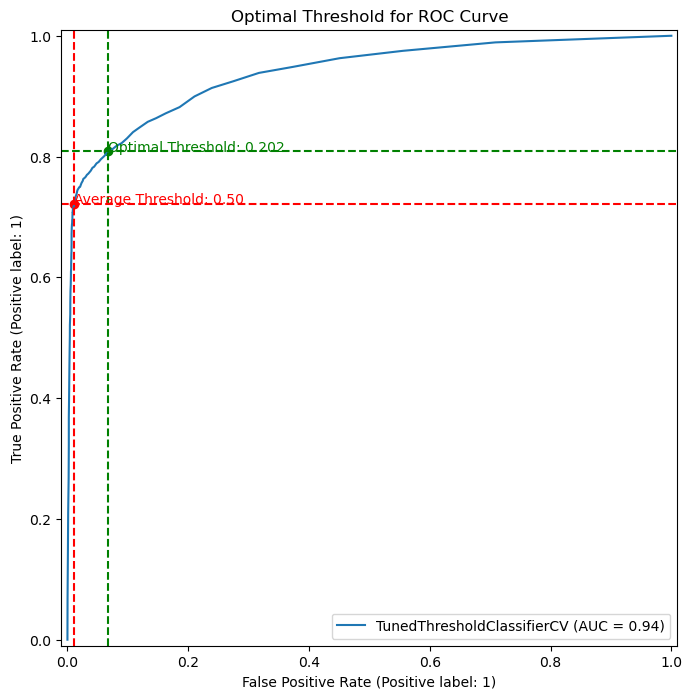

In [24]:
# Display the ROC Curve
fig, ax = plt.subplots(figsize=(8, 8))
RocCurveDisplay.from_estimator(model, X_val, y_val, ax=ax)
ax.set_title('Optimal Threshold for ROC Curve')


# add optimal point coordinates
ax.axvline(fpr_optimal, color='g', linestyle='--')
ax.axhline(tpr_optimal, color='g', linestyle='--')
ax.scatter(fpr_optimal, tpr_optimal, color='green')  # Añadir el punto
ax.text(fpr_optimal, tpr_optimal, f'Optimal Threshold: {optimal_threshold:.3f}', color='green')

# add average point coordinates
ax.axvline(fpr_average, color='r', linestyle='--')
ax.axhline(tpr_average, color='r', linestyle='--')
ax.scatter(fpr_average, tpr_average, color='red')  # Añadir el punto
ax.text(fpr_average, tpr_average, f'Average Threshold: {average_threshold:.2f}', color='red')

### Generate submission file

Looking at the `submission_sample.csv` file we see that it hmut have two columns: `id` and `loan_status`. The `id` column must have the same values as the test set and the `loan_status` column must have the predictions.

In [25]:
# Save the CSV to be submitted to a file
SUBMISSION_CSV_PATH = DATA_FOLDER + 'submission.csv'

# obtain the predictions
y_test_pred = model.predict(test_df)


# prepare the data to be submitted
ids_column = test_df.index
submission_data = {
    "id": ids_column,
    "loan_status": y_test_pred
}

# save it to a CSV file
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv(SUBMISSION_CSV_PATH, index=False)
submission_df.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0


## 9. Model Tracking

Once we have trained the model we can use the MLFlow library to track the model performance. We can log the AUC, the metrics, the submission file...

### Connect to MLFlow

In [26]:
import mlflow


mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("loan_prediction")

<Experiment: artifact_location='mlflow-artifacts:/476089677257814948', creation_time=1738517407731, experiment_id='476089677257814948', last_update_time=1738517407731, lifecycle_stage='active', name='loan_prediction', tags={}>

### Submit to MLFlow

In [27]:
with mlflow.start_run():

    mlflow.set_tag("model", model.__class__.__name__)

    mlflow.log_metric("auc", auc_metric)
    mlflow.log_metric("optimal_threshold", optimal_threshold)
    mlflow.log_metric("fpr_optimal", fpr_optimal)
    mlflow.log_metric("tpr_optimal", tpr_optimal)
    mlflow.log_metric("average_threshold", average_threshold)
    mlflow.log_metric("fpr_average", fpr_average)
    mlflow.log_metric("tpr_average", tpr_average)

    mlflow.sklearn.log_model(model, "model")
    mlflow.log_artifact(SUBMISSION_CSV_PATH)

2025/02/02 20:15:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run brawny-bug-595 at: http://localhost:5000/#/experiments/476089677257814948/runs/8789a54c2ffc4bb48ba415b3f5151eb0
🧪 View experiment at: http://localhost:5000/#/experiments/476089677257814948


## 10. Kaggle Submission


Finally we can submit the predictions to the kaggle platfrom. To do so we are going to retrieve the submission CSV from the best MLFlow run and submit it to the kaggle platform. You could upload the results manually by going to the kaggle website and clicking on `Submit Predictions`. You can then upload the file and submit it. Or you can use the kaggle API to submit the file:

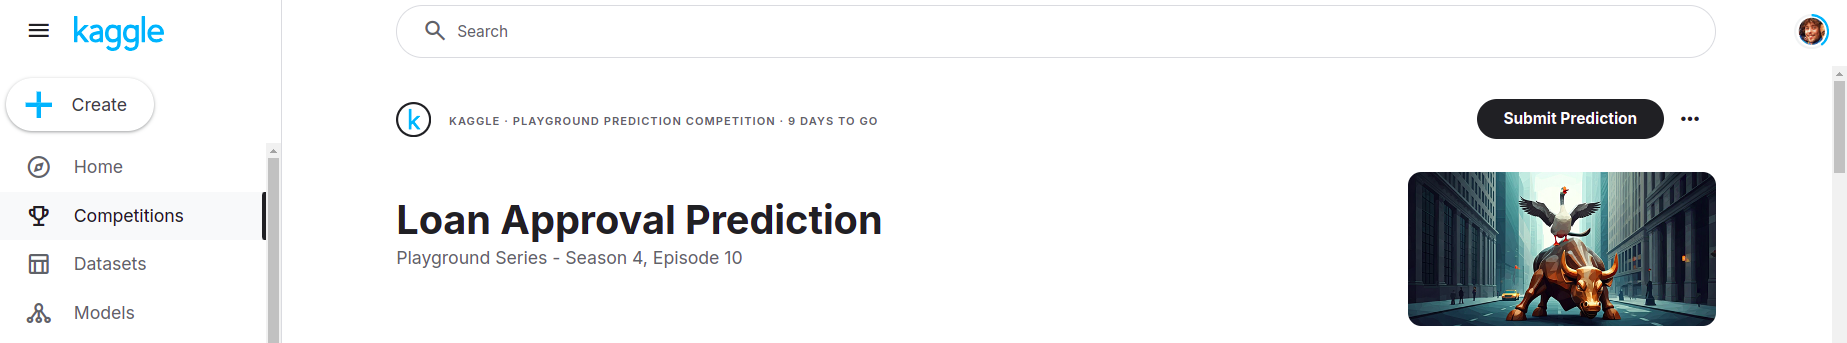

### 🎉 My Submission!:

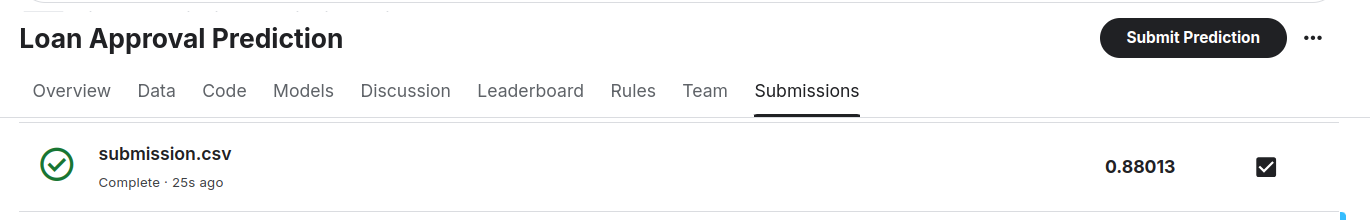

## Docker Model

In [28]:
#Export model

import cloudpickle

runner_id = "8789a54c2ffc4bb48ba415b3f5151eb0" #You can change this with your runner id
model_url = f"runs:/{runner_id}/model"
model = mlflow.sklearn.load_model(model_url)

with open("loan_predictions_kimberly_b.pkl", "wb") as f:
    cloudpickle.dump(model, f)
print("Export OK!")

Export OK!


In [29]:
#Use this file to Dockerfile 

with open("loan_predictions_kimberly_b.pkl", "rb") as f:
    model = cloudpickle.load(f)

model

TunedThresholdClassifierCV(estimator=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['person_income',
                                                                                        'person_emp_length',
                                                                                        'loan_amnt',
                                                                                        'loan_int_rate',
                                                                                        'loan_percent_income',
                                                                                        'cb_person_cred_hist_length']),
                                                                                      ('cat',
                                                                                       OneHotEncoder(),
                                                                                       ['person_home_ownership',
                                                                                        'loan_intent',
                                                                                        'loan_grade',
                                                                                        'cb_person_default_on_file'])])),
                                                     ('base_model',
                                                      RandomForestClassifier(random_state=42))]),
                           scoring='roc_auc')